In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Dataset

In [90]:
df = pd.read_csv('cleaned_fies.csv')

In [91]:
df.head()

,REGION,PROVINCE,FAMILY_ID,FAMILY_SIZE,FOOD_EXPENSES,OTHER_DISBURSEMENT,NON_FOOD_EXPENSES,TOTAL_INCOME,TOTAL_EXPENSES,TOTAL_DISBURSEMENTS,OTHER_RECEIPTS,TOTAL_RECEIPTS,AREA_CLASS,PCAPITA_INCOME,SOCIAL_CLASS,NET_SAVINGS
0,1,28,1,2.50,161553.00,0,67389.00,607070.00,228942.00,228942.00,0,607070.00,2,242828.00,Lower-middle income,378128.00
1,1,28,2,6.00,197258.00,600,165819.00,411980.00,363077.00,363677.00,0,411980.00,2,68663.34,Lower-middle income,48903.00
2,1,28,3,3.50,176284.00,42709,340193.00,818212.00,516477.00,559186.00,0,818212.00,2,233774.86,Middle income,301735.00
3,1,28,4,2.50,102696.00,0,77742.00,258538.00,180438.00,180438.00,0,258538.00,2,103415.20,Low income,78100.00
4,1,28,5,3.00,171183.00,46524,219255.00,550724.00,390438.00,436962.00,2000,552724.00,2,183574.67,Lower-middle income,160286.00


# Preprocessing

In [ ]:
X = df.drop(columns=['SOCIAL_CLASS'])
y = df['SOCIAL_CLASS']

KeyError: "['TOTAL_INCOME'] not found in axis"

In [72]:
y.value_counts()

SOCIAL_CLASS
Low income             67700
Poor                   43265
Lower-middle income    37991
Middle income          10858
Upper-middle income     2715
Upper income             548
Rich                     191
Name: count, dtype: int64

In [73]:
y = y.map(
    {
        "Low income": 0,
        "Poor": 1,
        "Lower-middle income": 2,
        "Middle income": 3,
        "Upper-middle income": 4,
        "Upper income": 5,
        "Rich": 6
    }
)

In [74]:
y

0         2
1         2
2         3
3         0
4         2
         ..
163263    1
163264    0
163265    0
163266    1
163267    1
Name: SOCIAL_CLASS, Length: 163268, dtype: int64

In [75]:
X

,REGION,PROVINCE,FAMILY_ID,FAMILY_SIZE,FOOD_EXPENSES,OTHER_DISBURSEMENT,NON_FOOD_EXPENSES,TOTAL_INCOME,TOTAL_EXPENSES,TOTAL_DISBURSEMENTS,OTHER_RECEIPTS,TOTAL_RECEIPTS,AREA_CLASS,PCAPITA_INCOME,NET_SAVINGS
0,1,28,1,2.50,161553.00,0,67389.00,607070.00,228942.00,228942.00,0,607070.00,2,242828.00,378128.00
1,1,28,2,6.00,197258.00,600,165819.00,411980.00,363077.00,363677.00,0,411980.00,2,68663.34,48903.00
2,1,28,3,3.50,176284.00,42709,340193.00,818212.00,516477.00,559186.00,0,818212.00,2,233774.86,301735.00
3,1,28,4,2.50,102696.00,0,77742.00,258538.00,180438.00,180438.00,0,258538.00,2,103415.20,78100.00
4,1,28,5,3.00,171183.00,46524,219255.00,550724.00,390438.00,436962.00,2000,552724.00,2,183574.67,160286.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163263,17,59,163264,3.00,61092.00,0,49239.00,115984.00,110331.00,110331.00,0,115984.00,2,38661.33,5653.00
163264,17,59,163265,7.00,118469.00,14700,111454.00,249720.00,229923.00,244623.00,0,249720.00,2,35674.29,19797.00
163265,17,59,163266,3.50,72447.00,39000,56396.00,172950.00,128843.00,167843.00,0,172950.00,2,49414.29,44107.00
163266,17,59,163267,4.00,64604.00,0,69133.00,135640.00,133737.00,133737.00,0,135640.00,2,33910.00,1903.00


In [94]:
X = X.drop(columns=['TOTAL_INCOME'])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)



# Baseline Model (LazyPredict)

In [100]:
# DT classifier

clf = LogisticRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.990965884730814


<Axes: >

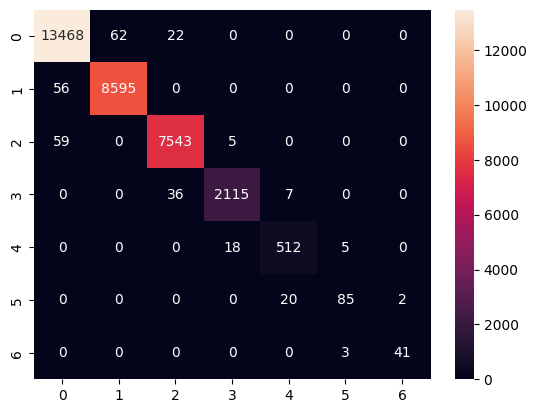

In [101]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')